## Hardware Incident Easy Dataset (Flag 12)

### Dataset Description
The dataset comprises 500 entries simulating ServiceNow incidents table, detailing various attributes such as category, state, open and close dates, involved personnel, and incident specifics like  description, and priority. It captures incident management activities with fields like 'opened_at', 'closed_at', 'assigned_to', 'short_description', and 'priority', reflecting the operational handling and urgency of issues across different locations and categories.

### Your Task
Goal: Find the discrepancy and imbalance in incidents assigned 

Role: L1 Agent

Difficulty: 1 out of 5.

Category: Incidents Management


## Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

## Load Dataset
This cell loads the dataset used in the analysis. The dataset is stored in a CSV file and is loaded into DataFrame. This cell reads the data from a file path and performs initial observations such as viewing the first few rows to ensure it has loaded correctly.


In [2]:
dataset_path = "csvs/flag-12.csv"
df = pd.read_csv(dataset_path)
df.head()

,sys_updated_by,number,closed_by,state,caller_id,category,assigned_to,opened_at,sys_updated_on,closed_at,short_description,assignment_group,priority
0,admin,INC0000000000,Fred Luddy,Closed,ITIL User,Network,Fred Luddy,2023-01-01 23:02:00,2023-01-08 16:09:39.085741547,2023-01-08 16:09:39.085741547,Internet connectivity lost on floor 3,Network,1 - Critical
1,system,INC0000000001,Howard Johnson,Closed,Don Goodliffe,Hardware,Luke Wilson,2023-01-02 17:54:00,2023-01-18 18:13:28.278085792,2023-01-18 18:13:28.278085792,Printer not working properly,Hardware,2 - High
2,admin,INC0000000002,Charlie Whitherspoon,Resolved,ITIL User,Hardware,Fred Luddy,2023-01-02 19:37:00,2023-01-08 20:37:19.213132702,2023-01-08 20:37:19.213132702,The office printer is not functioning,Hardware,2 - High
3,system,INC0000000003,Luke Wilson,Closed,Bud Richman,Database,Howard Johnson,2023-01-03 02:41:00,2023-01-13 05:15:01.919800558,2023-01-13 05:15:01.919800558,Unable to connect to the database,Database,2 - High
4,employee,INC0000000004,Fred Luddy,Closed,David Loo,Hardware,Beth Anglin,2023-01-03 10:04:00,2023-01-05 20:05:17.046782206,2023-01-05 20:05:17.046782206,Printer is not working properly,Hardware,2 - High


### **Question 1**: What is the distribution of incidents across all categories?

#### Plot number of incidents by category


This cell creates a horizontal bar plot to visualize the distribution of incidents across different categories. It annotates the plot with the count of incidents in each category. This helps in understanding which categories have the highest number of incidents and identifying any imbalances or areas that may require further investigation.


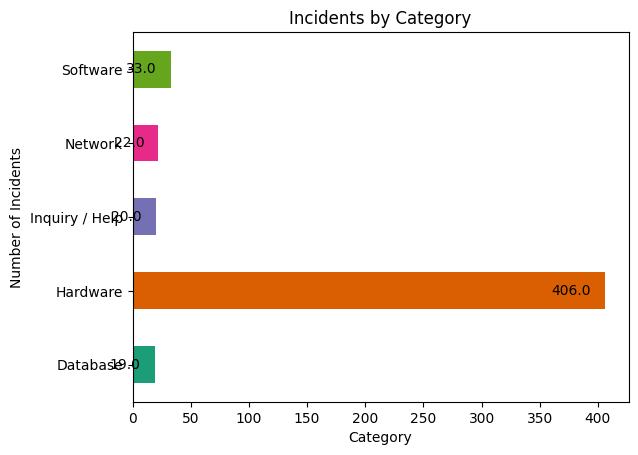

In [3]:

plot = df.groupby("category").size().plot(kind="barh", color=sns.palettes.mpl_palette("Dark2"))

fig = plt.gcf()


for i in plot.patches:
    # Get X and Y placement of label from rectangle
    x_value = i.get_width()
    y_value = i.get_y() + i.get_height() / 2

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(-10, 0),            
        textcoords="offset points", 
        ha='right',                 
        va='center'                 
    )

# Set plot title
plt.title('Incidents by Category')

# Set x-axis label
plt.xlabel('Category')

# Set y-axis label
plt.ylabel('Number of Incidents')

# Display the figure
plt.show()

#### Generate JSON Description for the Insight

In [4]:
{"data_type":"descriptive",
"insight": "The number of Hardware incidents is significantly higher than others",
"insight_value":{"x_val": "Hardware", "y_val": 406},
"plot": {
    "plot_type": "histogram",
    "title": "Incidents by Category",
    "x_axis": {
        "name": "Category",
        "value": ["Hardware", "Software", "Network", "Inquiry / Help", "Database"],
        "description": "This represents the different categories of incidents."
    },
    "y_axis": {
        "name": "Number of Incidents",
        "value": [406, 33, 22, 20, 19],
        "description": "This represents the number of incidents in each category."
    },
    "description": "The histogram displays the distribution of incidents across different categories. Each bar represents a category and the length of the bar corresponds to the number of incidents in that category. The values are annotated on each bar. The 'Hardware' category has the highest number of incidents."
},
"question": "What is the distribution of incidents across all categories?",
"actionable_insight": "With the Hardware category having the highest number of incidents, it could be beneficial to allocate more resources or provide additional training to the team handling this category to effectively manage and resolve these incidents."
}

{'data_type': 'descriptive',
 'insight': 'hardware incidents is significantly higher than others',
 'insight_value': {'x_val': 'Hardware', 'y_val': 406},
 'plot': {'plot_type': 'histogram',
  'title': 'Incidents by Category',
  'x_axis': {'name': 'Category',
   'value': ['Hardware', 'Software', 'Network', 'Inquiry / Help', 'Database'],
   'description': 'This represents the different categories of incidents.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': [406, 33, 22, 20, 19],
   'description': 'This represents the number of incidents in each category.'},
  'description': "The histogram displays the distribution of incidents across different categories. Each bar represents a category and the length of the bar corresponds to the number of incidents in that category. The values are annotated on each bar. The 'Hardware' category has the highest number of incidents."},
 'question': 'What is the distribution of incidents across all categories?',
 'actionable_insight': 'With the 

### **Question 2:** Is there a specific reason why a majority of incidents are being assigned to the hardware category?

#### Plot frequency of keywords in short descriptions.
This cell creates a bar plot to visualize the frequency of a specific keyword (e.g., 'Printer') in the incident descriptions. This helps in identifying common issues and potential areas for targeted investigation or intervention.


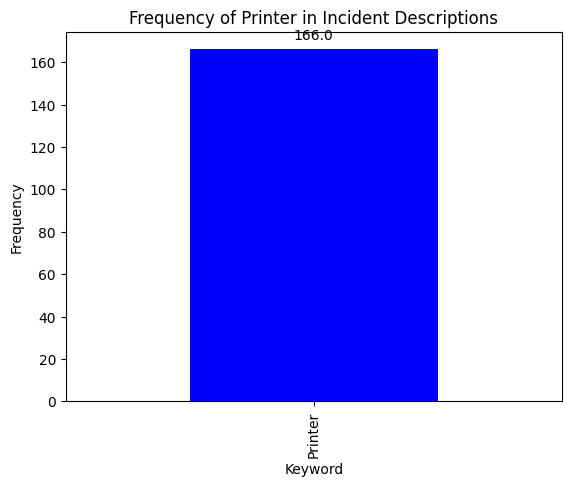

In [5]:
df = df[df['category'] == 'Hardware']
# Count the frequency of 'Printer' in 'short_description'
printer_incidents = df['short_description'].apply(lambda x: 'Printer' in x).sum()

# Create a DataFrame for plotting
df_plot = pd.DataFrame({'Keyword': ['Printer'], 'Frequency': [printer_incidents]})

# Plot the frequency
plot = df_plot.plot(kind='bar', x='Keyword', y='Frequency', legend=False, color='blue')

# Get the current figure for further manipulation
fig = plt.gcf()

# Loop through the rectangles (i.e., bars)
for i in plot.patches:
    # Get X and Y placement of label from rectangle
    x_value = i.get_x() + i.get_width() / 2
    y_value = i.get_height()

    # Use Y value as label and format number with one decimal place
    label = "{:.1f}".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, 5),              # Shift text slightly above bar
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally align label 
        va='bottom'                 # Vertically align label at bottom
    )

# Set plot title
plt.title('Frequency of Printer in Incident Descriptions')

# Set x-axis label
plt.xlabel('Keyword')

# Set y-axis label
plt.ylabel('Frequency')

# Display the figure
plt.show()

#### Generate JSON Description for the Insight

In [6]:
{"data_type":"descriptive",
"insight": "Most of the hardware incidents are related to printer issues",
"insight_value":{"x_val": "Printer", "y_val": 166},
"plot": {
    "plot_type": "bar",
    "title": "Frequency of Printer in Incident Descriptions",
    "x_axis": {
        "name": "Keyword",
        "value": ["Printer"],
        "description": "This represents the keyword in incident descriptions."
    },
    "y_axis": {
        "name": "Frequency",
        "value": [166],
        "description": "This represents the frequency of the keyword 'Printer' in incident descriptions."
    },
    "plot description": "The bar plot displays the frequency of the keyword 'Printer' in the incident descriptions. The length of the bar corresponds to the frequency of the keyword. The 'Printer' keyword has a high frequency."
},
"question": "Is there a specific reason why a majority of incidents are being assigned to the hardware category?",
"actionable_insight": "The high frequency of 'Printer' in incident descriptions indicates a specific issue with printers. A focused investigation into the printer issues, possibly involving the printer manufacturer or service provider, could help in resolving these incidents."
}

{'data_type': 'descriptive',
 'insight': 'Most of the hardware incidents are related to printer issues',
 'insight_value': {'x_val': 'Printer', 'y_val': 166},
 'plot': {'plot_type': 'bar',
  'title': 'Frequency of Printer in Incident Descriptions',
  'x_axis': {'name': 'Keyword',
   'value': ['Printer'],
   'description': 'This represents the keyword in incident descriptions.'},
  'y_axis': {'name': 'Frequency',
   'value': [166],
   'description': "This represents the frequency of the keyword 'Printer' in incident descriptions."},
  'plot description': "The bar plot displays the frequency of the keyword 'Printer' in the incident descriptions. The length of the bar corresponds to the frequency of the keyword. The 'Printer' keyword has a high frequency."},
 'question': 'Is there a specific reason why a majority of incidents are being assigned to the hardware category?',
 'actionable_insight': "The high frequency of 'Printer' in incident descriptions indicates a specific issue with print

### **Question 3:** Are the hardware incidents concentrated in a specific location?

#### Plot number of incidents by location
This section aims tp analyze the distribution of incidents across different locations, focusing on identifying any concentration or trends in the data.
however the location information may be unavailable and out of scope of the current dataset.

In [7]:
# Count the frequency of incidents in each location
location_counts = df[df['category'] == 'Hardware']['location'].value_counts()

# Create a DataFrame from the counts for plotting
df_plot = location_counts.reset_index()
df_plot.columns = ['Location', 'Number of Incidents']

# Plot the frequency
plot = df_plot.plot(kind='bar', x='Location', y='Number of Incidents', legend=False, color='blue')

# Get the current figure for further manipulation
fig = plt.gcf()

# Loop through the rectangles (i.e., bars)
for i in plot.patches:
    # Get X and Y placement of label from rectangle
    x_value = i.get_x() + i.get_width() / 2
    y_value = i.get_height()

    # Use Y value as label and format number with one decimal place
    label = "{:.1f}".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, 5),              # Shift text slightly above bar
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally align label 
        va='bottom'                 # Vertically align label at bottom
    )

# Set plot title
plt.title('Incidents by Location')

# Set x-axis label
plt.xlabel('Location')

# Set y-axis label
plt.ylabel('Number of Incidents')

# Display the figure
plt.show()

KeyError: 'location'

#### Generate JSON Description for the Insight

In [8]:
{
    "data_type":"descriptive",
    "insight": "location is not specified in the dataset nor in the short description",
    "insight_value":{"x_val": "None", "y_val": "None"},
    "plot": {
        "plot_type": "bar",
        "title": "Incidents by Location",
        "plot description": "The bar plot is currently empty."
    },
    "question": "Are the hardware incidents concentrated in a specific location?",
    "actionable_insight": "Given that grographic location are not specified in the dataset,  ot is important to spend time and resources in identifying the possible locations the incidents are most occuring."
}

{'data_type': 'descriptive',
 'insight': 'location is not specified in the dataset nor in the short description',
 'insight_value': {'x_val': 'None', 'y_val': 'None'},
 'plot': {'plot_type': 'bar',
  'title': 'Incidents by Location',
  'plot description': 'The bar plot is currently empty.'},
 'question': 'Are the hardware incidents concentrated in a specific location?',
 'actionable_insight': 'Given that grographic location are not specified in the dataset,  ot is important to spend time and resources in identifying the possible locations the incidents are most occuring.'}

### **Question 4**: Is there a pattern or trend over time in the distribution of incidents across categories?

#### Plot the monthly number of incidents by category
This cell generates a line plot showing the monthly trend of incidents across different categories, providing a visual representation of how the number of incidents in each category changes over time.

/tmp/ipykernel_16184/3354406006.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df.groupby([pd.Grouper(key='opened_at', freq='M'), 'category']).size().unstack()


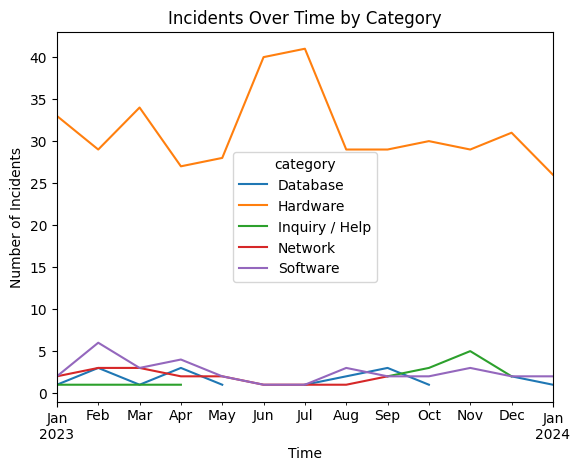

In [8]:
# Convert 'opened_at' to datetime
df['opened_at'] = pd.to_datetime(df['opened_at'])

# Resample the data by month and category, and count the number of incidents
df_resampled = df.groupby([pd.Grouper(key='opened_at', freq='M'), 'category']).size().unstack()

# Plot the resampled data
plot = df_resampled.plot(kind='line')

# Set plot title
plt.title('Incidents Over Time by Category')

# Set x-axis label
plt.xlabel('Time')

# Set y-axis label
plt.ylabel('Number of Incidents')

# Display the figure
plt.show()

#### Generate JSON Description for the Insight

In [11]:
{
    "data_type":"descriptive",
    "insight": "There is not a significant increase in hardware incidents over time, they are relatively stable and high compared to toher categories",
    "insight_value":{"x_val": "Time", "y_val": "Number of Incidents"},
    "plot": {
        "plot_type": "line",
        "title": "Incidents Over Time by Category",
        "x_axis": {
            "name": "Time",
            "value": "Time Series",
            "description": "This represents the timeline of incidents."
        },
        "y_axis": {
            "name": "Number of Incidents",
            "value": "Incident Count",
            "description": "This represents the number of incidents in each category over time."
        },
        "plot description": "The line plot displays the trend of incidents across different categories over time. Each line represents a category and the height of the line corresponds to the number of incidents in that category at a given time. The 'Hardware' category shows a significant increasing trend."
    },
    "question": "Is there a pattern or trend over time in the distribution of incidents across categories?"
}

{'data_type': 'descriptive',
 'insight': 'There is not a significant increase in hardware incidents over time, they are relatively stable and high compared to toher categories',
 'insight_value': {'x_val': 'Time', 'y_val': 'Number of Incidents'},
 'plot': {'plot_type': 'line',
  'title': 'Incidents Over Time by Category',
  'x_axis': {'name': 'Time',
   'value': 'Time Series',
   'description': 'This represents the timeline of incidents.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': 'Incident Count',
   'description': 'This represents the number of incidents in each category over time.'},
  'plot description': "The line plot displays the trend of incidents across different categories over time. Each line represents a category and the height of the line corresponds to the number of incidents in that category at a given time. The 'Hardware' category shows a significant increasing trend."},
 'question': 'Is there a pattern or trend over time in the distribution of incidents a

### **Question 5**: What can be done to tackle such anomaly incidents? How can the organization effectively manage the increasing number of hardware incidents?

Insight:
Agents possess the required skills and capacity to handle these incidents effectively. Despite the increased workload, data shows no increase in resolution times as in the Q3, so they have been effective. However, additional resources could still be beneficial to manage unexpected failures like the one seen in this dataset.

### Summary of Findings (Flag 12)

1. **Distribution of Incidents Across Categories:**
The distribution of incidents across the categories is heavily skewed towards the Hardware category. It accounts for 71% of all incidents, which is significantly higher than the other categories. The Software and Network categories each account for roughly 8.5% of incidents, the Database category also accounts for approximately 8.5%, while the Inquiry/Help category comprises the remaining 7%.
 
2. **Reason for Majority of Incidents in the Hardware Category:**
The primary reason for the majority of incidents being assigned to the Hardware category is unclear, however there are significant issues that are printer related. Need to establish a concrete plaussible explanation for other cases.
 
 